# Cyclo-octane

The goal of this notebook is to understand the topology of the energy landscape of _cyclo-octane_.

- Martin, Shawn et al. _Topology of cyclo-octane energy landscape._ **The Journal of chemical physics** vol. 132,23 (2010)
- Stolz, B. J., Tanner, J., Harrington, H. A., & Nanda, V.  _Geometric anomaly detection in data._ **Proceedings of the National Academy of Sciences of the United States of America**, 117(33), 19664–19669 (2020).

<img src='../figures/Conformation-space-of-cyclo-octane.jpeg' width="400" height="100"> 

**Conformation space of cyclo-octane.** The set of conformations of cyclo-octane can be represented as a surface in a high- dimensional space. (a) Various conformations of cyclo-octane. (b) These conformations are represented by the 3D coordinates of their atoms. The coordinates are concatenated into vectors and shown as columns of a data matrix. As an example, the entry $c_{1,1,x}$ of the matrix denotes the $x$-coordinate of the first carbon atom in the first molecule. (c) The Isomap projection is used to obtain a lower dimensional visualization of the data. 

## Point cloud

In [19]:
import scipy.io
data = scipy.io.loadmat('../data/pointsCycloOctane.mat')['pointsCycloOctane']
data.shape

(6040, 24)

## Visualization

In [20]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import seaborn as sns

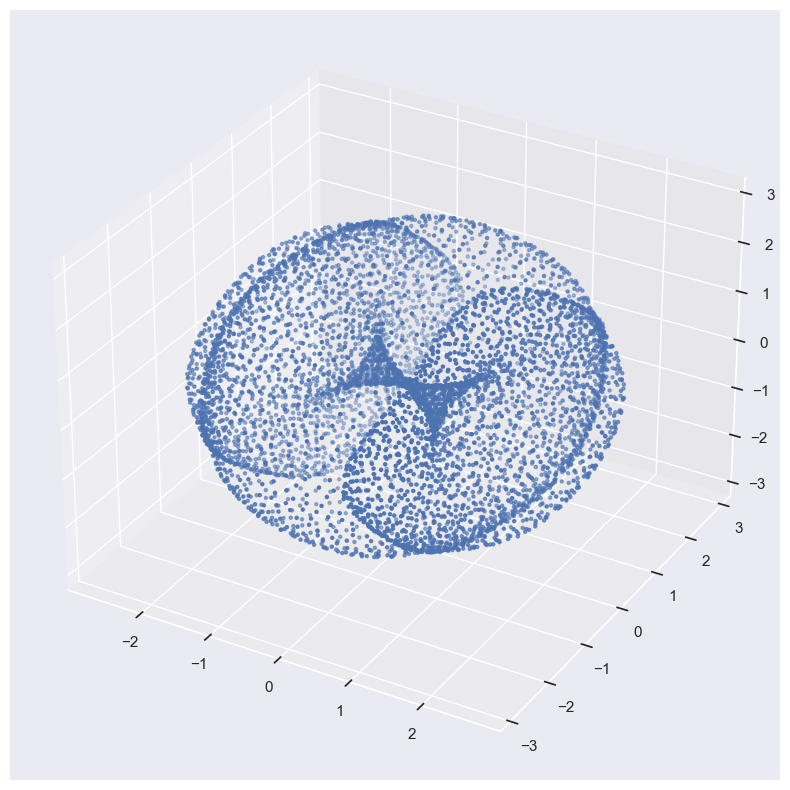

In [21]:
embedding = Isomap(n_components= 3, n_neighbors=10)
embedding_data = embedding.fit_transform(data)

sns.set()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(embedding_data[:,0], embedding_data[:,1], embedding_data[:,2], s=5);

## Persistent homology

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


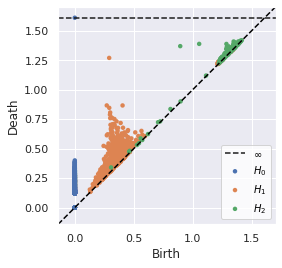

In [4]:
from ripser import Rips
import numpy as np

data_subsample = data[np.random.randint(0,data.shape[0]-1, 2000)]
sns.set()
rips = Rips(maxdim = 2, coeff = 2)
dgm = rips.fit_transform(data_subsample)
rips.plot(dgm)

## Geometric anomalies

In [22]:
from utils import *

In [23]:
k2 = 60
k1 = 20
mask = compute_local_persistence(data, [k1, k2])

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


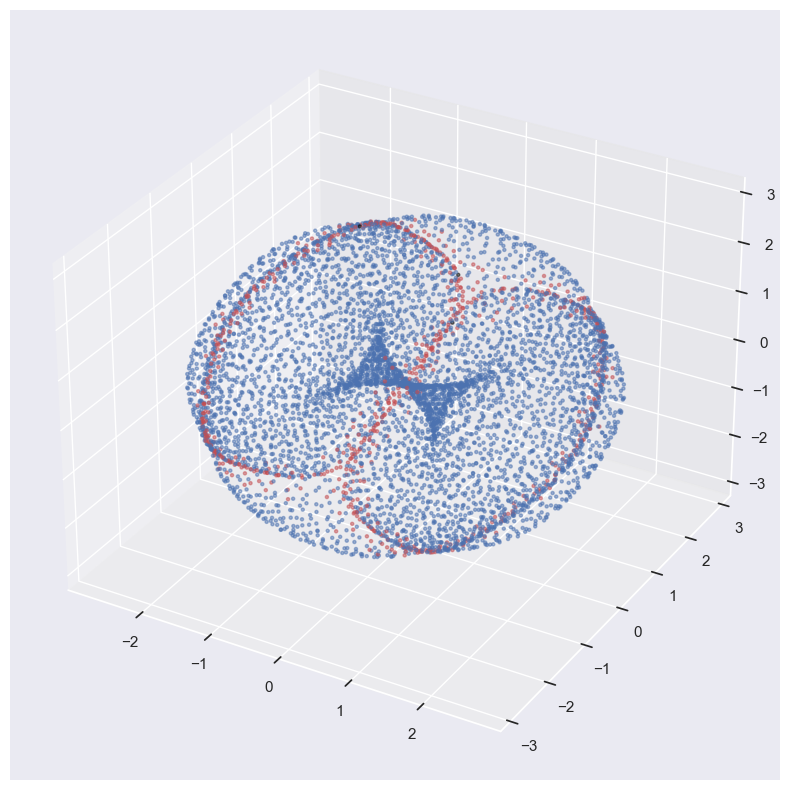

In [7]:
sns.set()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
colormap = np.array(['black', 'b', 'r'])
ax.scatter(embedding_data[:,0], embedding_data[:,1], embedding_data[:,2], s=5, c = colormap[mask], alpha = 0.5);

## Local dimension

In [24]:
dimensions, recovered_variances = local_pca(50, data)
(dimensions==2).sum()/len(dimensions)

0.7996688741721855

In [25]:
dimensions[dimensions==None]=0

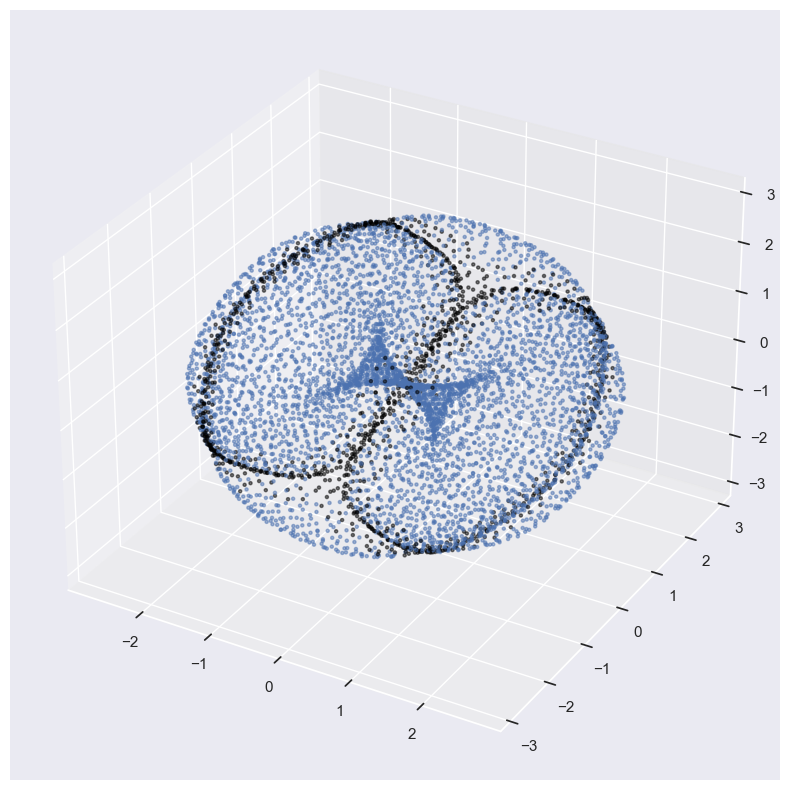

In [27]:
sns.set()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
colormap = np.array(['black', 'r', 'b'])
ax.scatter(embedding_data[:,0], embedding_data[:,1], embedding_data[:,2], s=5, c = colormap[dimensions.astype(int)], alpha = 0.5);